In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

# https://gymnasium.farama.org/environments/classic_control/pendulum/#pendulum

ENV_NAME = 'Pendulum-v1'
env = gym.make(ENV_NAME, g=9.81, render_mode="rgb_array")
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<PendulumEnv<Pendulum-v1>>>>>

In [2]:
env.observation_space 

Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)

In [3]:
env.action_space # Torque

Box(-2.0, 2.0, (1,), float32)

In [4]:
observation, info = env.reset()
observation, info

(array([ 0.2296893, -0.973264 ,  0.5407882], dtype=float32), {})

In [5]:
x, y, angular_velocity = observation
x, y, angular_velocity

(0.2296893, -0.973264, 0.5407882)

In [6]:
action = env.action_space.sample() # choose a random action
action

array([1.0630106], dtype=float32)

In [7]:
observation, reward, terminated, truncated, info = env.step(action)
observation, reward, terminated, truncated, info

(array([ 0.22891845, -0.9734456 , -0.01583923], dtype=float32),
 -1.8233976389906872,
 False,
 False,
 {})

In [8]:
env_screen = env.render() # numpy array

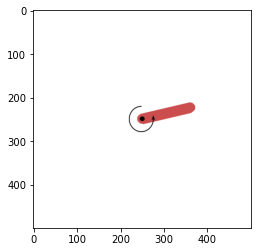

In [9]:
plt.imshow(env_screen)

In [10]:
###################################
# play Pendulum-v1 with a policy
###################################

import gym
import numpy as np

ENV_NAME = 'Pendulum-v1'
env = gym.make(ENV_NAME , render_mode="rgb_array")
observation, _ = env.reset()
env_screens = []

terminated = False
truncated = False
observation, _ = env.reset()
total_reward = 0.0
while not terminated and not truncated:
    action = env.action_space.sample() 
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    env_screens.append(env.render())
rewards = total_reward
rewards

C:\Users\t\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


-1175.748841571494

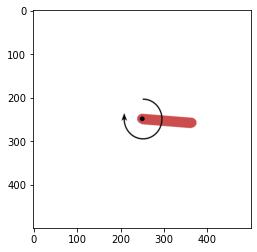

In [11]:
####################################################
# create an animation
#===================================================
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


fig, ax = plt.subplots()
im = ax.imshow(env_screens[0])

def update(i):
    im.set_data(env_screens[i])
    return (im)

animation = FuncAnimation(fig=fig, func=update, frames=len(env_screens), interval=100)
plt.show()

# display the animation in the notebook
HTML(animation.to_jshtml())
